In [2]:
import pandas as pd

In [4]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("malls.csv")

In [10]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [12]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df=df.drop(["CustomerID"],axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [18]:
df.Genre.unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df.Genre=df.Genre.replace({'Male':1,'Female':0})

In [22]:
df.Genre.unique()

array([1, 0])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(df)

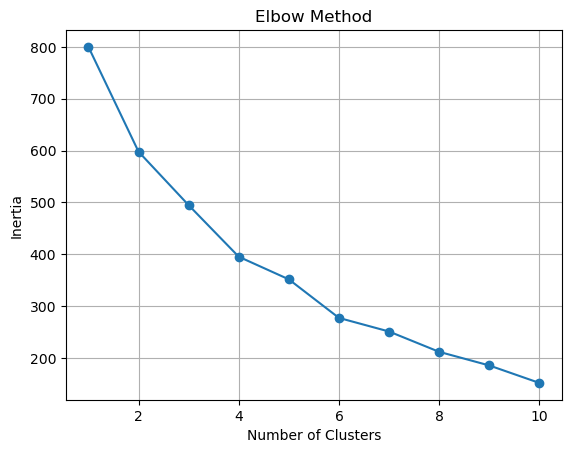

In [34]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_data_df)
    inertia.append(km.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()

In [38]:
kmeans_malls=KMeans(n_clusters=4)
kmeans_malls.fit(scaled_data_df)

KMeans(n_clusters=4)

In [52]:
kmeans_malls.cluster_centers_

array([[-0.88640526, -0.72101993, -0.05391275,  0.5879239 ],
       [-0.07408372,  1.09652557, -0.54158726, -0.39723223],
       [ 0.29862851,  0.17329545,  1.06645385, -1.2980103 ],
       [ 1.12815215, -0.69521894,  0.01413157,  0.76505559]])

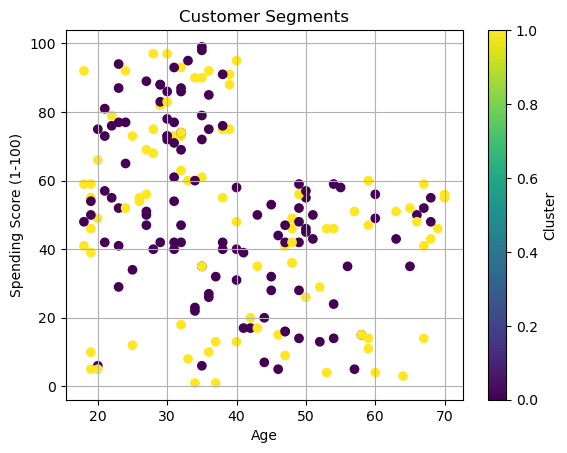

In [60]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], 
            c=df['Genre'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()